In [4]:
# SUPERVISED LEARNING
# REGRESSION - Simple Learning Regression

# Import All Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Stage 1 : Data Gathering
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [6]:
# Stage 2 : EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 420.0+ bytes


In [7]:
# Stage 3 : Data Preparation
# handle missing values
# remove duplicate records
# convert non-numerical features into numerical
# normalization
# select independent and dependent variable

In [8]:
# handle missing values
data.isnull().sum()

,0
Hours_Studied,0
Test_Grade,0
Status,0
Result,0


In [9]:
# remove duplicate data
data.duplicated().sum()

np.int64(0)

In [10]:
# convert non-numerical to numerical
# categorical data -> yes no , true false , fail pass etc.

import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [11]:
lb.fit_transform(['yes','no'])

array([[1],
       [0]])

In [12]:
lb.fit_transform(['correct','wrong']) # can't be use

array([[0],
       [1]])

In [13]:
data.Status = lb.fit_transform(data.Status)
data

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      int64 
 3   Result         9 non-null      object
dtypes: int64(3), object(1)
memory usage: 420.0+ bytes


In [15]:
# d.) normalization
# For machine learning, every dataset does not require normalization. It is
# required only when features have different ranges.

# The goal of normalization is to change the values of numeric
# columns in the dataset to a common scale.

# when you normalize your data you're not changing its meaning --> you're just changing
# its scale so that the model can learn efficiently

# after normalization features are on comparable scale

# 2000 <---> 0.002036659877800407
# model trains on 0.002 instead of 2000

'''
                       example dataset where features have a different range
  age       income
  18        2000            0.00203666
  19        4500            0.0274949083503055
  20        1800
  21        100000
  22         50000
  23         12000
  24         80000

min = 1800
max = 100000

Xnorm = (Xi - Xmin)/(Xmax - Xmin)
Xnorm = (2000 - 1800)/(100000 - 1800)
Xnorm = 0.00203666


'''

# syntax
# vals = data.Test_Grade.values
# print(vals)

# import sklearn.preprocessing as pp
# nrmlz1 = pp.normalize([vals])
# print(nrmlz1)

# nrmlz2 = pp.MinMaxScaler().fit_transform([vals])
# print(nrmlz2)
print()

In [16]:
x = (4500 - 1800)/(100000 - 1800)
print(x)

0.0274949083503055


In [17]:
# select independent n dependent variable

# X -> independent var
# scikit-learn expect X to be 2D even 1 feature

X = data.Hours_Studied.values
X = X.reshape(9,1)
X.shape

(9, 1)

In [18]:
# Y --> dependent value
Y = data.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [19]:
# Stage 4 : Model Development [Apply Suitable ML Algorithm on Dataset]
import sklearn.linear_model as lm
linear_reg = lm.LinearRegression()

In [20]:
linear_reg.fit(X,Y)

LinearRegression()

In [21]:
import pickle
pickle.dump(linear_reg,open('model.pkl','wb'))

In [22]:
# Stage 5 : Model Evaluation
data['Predicted Value'] = linear_reg.predict(X)

In [23]:
data[['Hours_Studied','Test_Grade','Predicted Value']]

,Hours_Studied,Test_Grade,Predicted Value
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [24]:
pred_values = linear_reg.predict(X)
pred_values

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

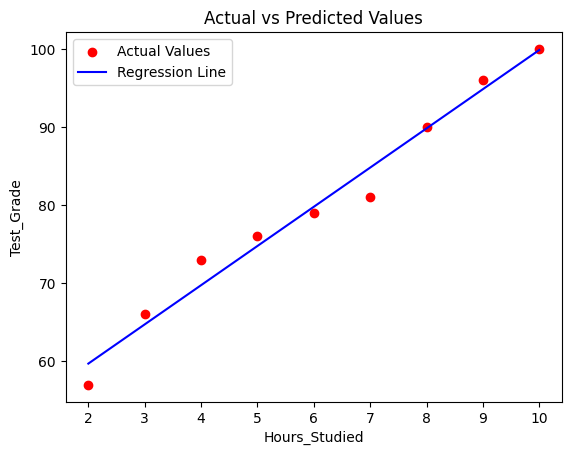

In [25]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot regression line
plt.plot(X,pred_values,color='blue',label='Regression Line')
plt.title('Actual vs Predicted Values')
plt.xlabel('Hours_Studied')
plt.ylabel('Test_Grade')
plt.legend()
plt.show()

In [26]:
# R-squared
# after fitting the line we want to know how well the line explains the data - that's where R2 comes in
 # regression score function

from sklearn.metrics import r2_score
regressionScore = r2_score(Y,pred_values)
print('Regression Score Function : ',regressionScore)
print(f'Regression Score Function : {int(regressionScore*100)}%')

Regression Score Function :  0.9757431074095347
Regression Score Function : 97%


In [27]:
# Stage 6 : Final Prediction
hrs = float(input('Enter Hours of Study : '))
marks = linear_reg.predict([[hrs]])
print(f'Predicted Grade : {int(marks[0])}')

Enter Hours of Study : 2
Predicted Grade : 59


In [28]:
hrs = float(input('Enter Hours of Study : '))
if hrs>=1 and hrs<=10:
    marks = linear_reg.predict([[hrs]])
    print(f'Predicted Grade : {int(marks[0])}')
else:
    print('Invalid Input. Please Enter Value from 1 to 10')

Enter Hours of Study : 4
Predicted Grade : 69
